# Baseline models comparison

In [1]:
import joblib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tpr_rf = [joblib.load(f'rf_{i}.joblib') for i in range(10)]
mean_rf = joblib.load('rf_mean.joblib')

In [3]:
tpr_lr = [joblib.load(f'lr_{i}.joblib') for i in range(10)]
mean_lr = joblib.load('lr_mean.joblib')

In [4]:
tpr_fn = [joblib.load(f'ffnn_{i}.joblib') for i in range(10)]
mean_fn = joblib.load('ffnn_mean.joblib')

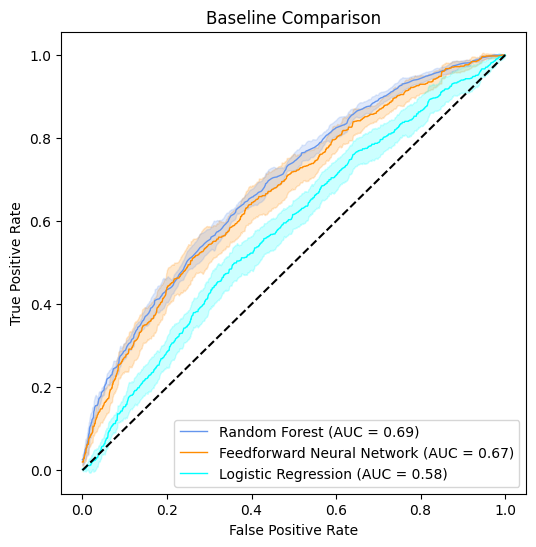

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))

# Corresponding FPR values (assumed to be the same across runs or fixed)
fpr_values = np.linspace(0, 1, num=len(tpr_rf[0]))


#mean_tpr = np.mean(tpr_runs, axis=0)
std_rf = np.std(tpr_rf, axis=0)
std_fn = np.std(tpr_fn, axis=0)
std_lr = np.std(tpr_lr, axis=0)

# Plot the average ROC curve
plt.plot(fpr_values, mean_rf, label=f'Random Forest (AUC = 0.69)', linewidth=1, color='cornflowerblue')
plt.plot(fpr_values, mean_fn, label=f'Feedforward Neural Network (AUC = 0.67)', linewidth=1, color='darkorange')
plt.plot(fpr_values, mean_lr, label=f'Logistic Regression (AUC = 0.58)', linewidth=1, color='aqua')

# Plot the variability as a shaded area (mean ± std)

plt.fill_between(fpr_values, 
                 mean_fn - std_fn, 
                 mean_fn + std_fn, 
                 color='darkorange', alpha=0.2)
plt.fill_between(fpr_values, 
                 mean_lr - std_lr, 
                 mean_lr + std_lr, 
                 color='aqua', alpha=0.2)

plt.fill_between(fpr_values, 
                 mean_rf - std_rf, 
                 mean_rf + std_rf, 
                 color='cornflowerblue', alpha=0.2)

plt.plot(fpr_values, fpr_values, linestyle="dashed", color='black')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Baseline Comparison')
plt.legend(loc='lower right')

# Show plot
plt.show()
